In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# 简单的卷积神经网络
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

In [6]:
# 设置训练参数
batch_size = 64
learning_rate = 0.001
epochs = 10

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='../../data', train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root='../../data', train=False, transform=transform, download=False)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# 初始化模型、损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
loss = None
# 训练模型
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 在测试集上进行评估
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += torch.Tensor((predicted == labels)).sum().item()

    accuracy = correct / total
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10, Loss: 0.0981, Test Accuracy: 0.9866
Epoch 2/10, Loss: 0.1356, Test Accuracy: 0.9883
Epoch 3/10, Loss: 0.0018, Test Accuracy: 0.9903
Epoch 4/10, Loss: 0.0493, Test Accuracy: 0.9902
Epoch 5/10, Loss: 0.0057, Test Accuracy: 0.9904
Epoch 6/10, Loss: 0.0019, Test Accuracy: 0.9884
Epoch 7/10, Loss: 0.0011, Test Accuracy: 0.9915
Epoch 8/10, Loss: 0.0032, Test Accuracy: 0.9894
Epoch 9/10, Loss: 0.0004, Test Accuracy: 0.9896
Epoch 10/10, Loss: 0.0002, Test Accuracy: 0.9903


In [8]:
def save_model(model):
    """
    保存模型
    """
    # 转换百分比形式
    accuracy_percent = f'{accuracy * 100:.2f}%'
    model_weights_filename = f'./{accuracy_percent}_simple_model_weights.pth'
    torch.save(model.state_dict(), model_weights_filename)

# save_model(model)

Using device:cuda
Predicted digit: 4


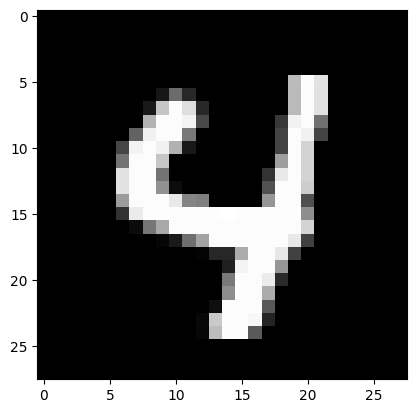

In [11]:
from matplotlib import pyplot as plt
from PIL import Image

# 设备配置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:{}".format(device))

# 转换器，将数据转换为tensor并归一化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载模型
model = SimpleCNN().to(device)
model.load_state_dict(torch.load('./99.03%_simple_model_weights.pth', map_location=device))
model.eval()

# 加载图片
image_path = r'X:\Coding\Github\LearnDeepWithPyTorch\code\data\images\test\4_826.png'
image = Image.open(image_path)

# 处理图片
image = transform(image).unsqueeze(0).to(device)  # 添加一个批次维度并发送到设备

# 预测
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)

print(f'Predicted digit: {predicted.item()}')

# 可视化图片
plt.imshow(image.cpu().squeeze(), cmap='gray')  # 如果需要在CPU上运行，确保调用.cpu()
plt.show()